In [1]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anime_selected = pd.read_csv("./Data/animeList_selected.csv", index_col=0)
anime_selected = anime_selected.reset_index(drop=True)
anime_selected.head(5)

,username,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_tags
0,karthiga,21,586,9,1,NaN,0,NaN
1,karthiga,59,26,7,2,NaN,0,NaN
2,karthiga,120,26,7,2,NaN,0,NaN
3,karthiga,249,167,8,2,NaN,0,NaN
4,karthiga,269,366,10,2,NaN,0,NaN


In [3]:
username_and_anime_id = anime_selected.drop(columns=["my_watched_episodes", "my_score", "my_status", "my_rewatching", "my_rewatching_ep", "my_tags"])

In [4]:
username_and_anime_id

,username,anime_id
0,karthiga,21
1,karthiga,59
2,karthiga,120
3,karthiga,249
4,karthiga,269
...,...,...
7433042,newsession,7791
7433043,Ryusai,5680
7433044,Ryusai,9041
7433045,Ryusai,6547


In [5]:
list_anime_id = anime_selected['anime_id'].unique().tolist()
print(f"Number of anime_id: {len(list_anime_id)}")

Number of anime_id: 200


In [6]:
userToAnimeList = defaultdict(list)

for idx, row in tqdm(username_and_anime_id.iterrows()):
    userToAnimeList[row["username"]].append(row["anime_id"])
    userToAnimeList[row["username"]].sort()

userToAnimeList


7433047it [05:13, 23743.84it/s]


defaultdict(list,
            {'karthiga': [21,
              59,
              120,
              249,
              269,
              853,
              857,
              1735,
              2104,
              2787,
              4224,
              6045,
              7054,
              7674,
              9513,
              11759,
              14227],
             'Damonashu': [1,
              6,
              19,
              20,
              21,
              24,
              30,
              32,
              45,
              66,
              71,
              121,
              150,
              164,
              199,
              205,
              225,
              226,
              227,
              228,
              237,
              245,
              249,
              269,
              270,
              339,
              355,
              356,
              431,
              457,
              578,
              813,
              853,
         

In [7]:
num_anime = len(list_anime_id)
adj = np.zeros((num_anime, num_anime), dtype=int)

for animelist in tqdm(userToAnimeList.values()):
    indices = np.array([list_anime_id.index(anime_id) for anime_id in animelist])
    i, j = np.triu_indices(len(indices), k=1)

    # Ensure correct order
    lower_indices = indices[i]
    higher_indices = indices[j]
    pairs = np.where(lower_indices < higher_indices, (lower_indices, higher_indices), (higher_indices, lower_indices))

    unique_pairs, counts = np.unique(pairs, axis=1, return_counts=True)
    adj[unique_pairs[0], unique_pairs[1]] += counts

  0%|          | 18/108296 [00:00<11:11, 161.20it/s]

100%|██████████| 108296/108296 [05:03<00:00, 356.80it/s] 


In [8]:
adj

array([[    0, 17766, 14820, ..., 13579, 14331, 14532],
       [    0,     0, 17981, ..., 10243, 12972, 12982],
       [    0,     0,     0, ...,  8076,  9668,  9464],
       ...,
       [    0,     0,     0, ...,     0, 13444, 13795],
       [    0,     0,     0, ...,     0,     0, 16509],
       [    0,     0,     0, ...,     0,     0,     0]])

In [9]:
adj.shape

(200, 200)

In [10]:
unique, counts = np.unique(adj, return_counts=True)
for i in range(len(unique)):
    if i > 0:
        print(f"{unique[i]} : {counts[i]} times")

6263 : 1 times
6368 : 1 times
6488 : 1 times
6624 : 1 times
6664 : 1 times
6694 : 1 times
6719 : 1 times
6804 : 1 times
6848 : 1 times
6889 : 1 times
6896 : 1 times
6927 : 1 times
6968 : 1 times
7039 : 1 times
7070 : 1 times
7140 : 1 times
7146 : 1 times
7158 : 1 times
7165 : 1 times
7204 : 1 times
7209 : 1 times
7210 : 1 times
7240 : 1 times
7248 : 1 times
7255 : 1 times
7274 : 1 times
7297 : 1 times
7365 : 1 times
7379 : 1 times
7380 : 1 times
7395 : 1 times
7398 : 1 times
7415 : 1 times
7428 : 1 times
7474 : 1 times
7484 : 1 times
7495 : 1 times
7505 : 1 times
7534 : 1 times
7537 : 1 times
7548 : 1 times
7553 : 1 times
7559 : 1 times
7567 : 1 times
7577 : 1 times
7578 : 1 times
7606 : 1 times
7629 : 1 times
7648 : 1 times
7650 : 1 times
7658 : 1 times
7659 : 1 times
7682 : 1 times
7686 : 1 times
7704 : 1 times
7725 : 1 times
7736 : 1 times
7746 : 1 times
7752 : 1 times
7754 : 1 times
7766 : 1 times
7771 : 1 times
7778 : 1 times
7792 : 1 times
7797 : 1 times
7800 : 1 times
7814 : 1 t

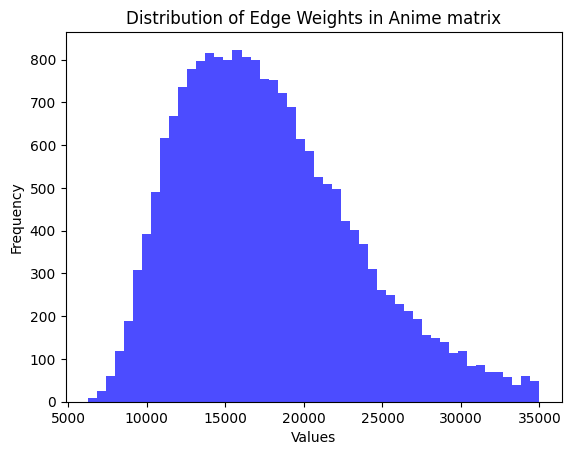

In [11]:
#Distribution of values in adj:
values = adj.flatten()
values = values[values > 0]
values = values[values < 35000]
values = values[values > 5000]

mean_weight = np.mean(values)
std_weight = np.std(values)
lower_threshold = mean_weight - std_weight*0.8
upper_threshold = mean_weight + std_weight*0.8



# Plotting the histogram
plt.hist(values, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Edge Weights in Anime matrix')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [12]:
lower_threshold, upper_threshold

(13318.327905565337, 22151.33732696898)

In [13]:
print(adj.shape)
adjFlat = values
adjFlat = np.sort(adjFlat)
list_anime_id = np.sort(list_anime_id)
adjFlat

(200, 200)


array([ 6263,  6368,  6488, ..., 34973, 34977, 34981])

In [14]:
import networkx as nx
G = nx.Graph()

G.add_nodes_from(list_anime_id)

for i in range(len(adj)):
  for j in range(i+1, len(adj)):
    if (adj[i][j]> lower_threshold) and (adj[i][j]<upper_threshold):
      G.add_edge(list_anime_id[i], list_anime_id[j], weight=adj[i][j])
G.remove_nodes_from(list(nx.isolates(G)))

Community 0:
  Number of nodes: 65
  Number of edges: 1705
  Average Degree Centrality: 0.8197115384615384
  Global Clustering Coefficient: 0.8178900939848913



Community 1:
  Number of nodes: 57
  Number of edges: 765
  Average Degree Centrality: 0.4793233082706768
  Global Clustering Coefficient: 0.13110042149642928



Community 2:
  Number of nodes: 78
  Number of edges: 2616
  Average Degree Centrality: 0.8711288711288714
  Global Clustering Coefficient: 0.8758161255416451





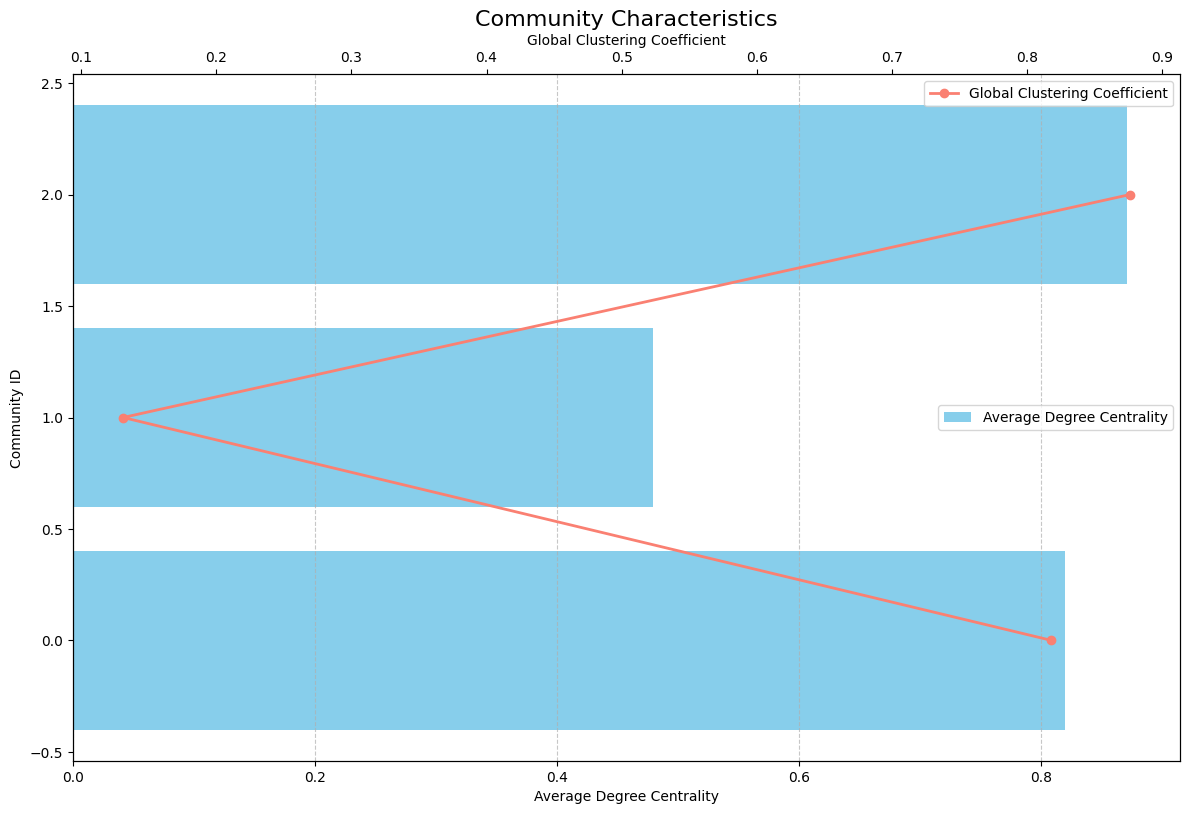

In [17]:
import community
# Louvain community detection on the weighted graph
partition = community.best_partition(G, weight='weight', random_state = 2023, resolution= 1)

communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)


average_degree_centrality_values = []
global_clustering_coefficient_values = []
community_ids = []

for community_id, nodes in communities.items():
    subgraph = G.subgraph(nodes)
    
    degree_centrality = nx.degree_centrality(subgraph)
    average_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)

    global_clustering_coefficient = nx.average_clustering(subgraph)

    print(f"Community {community_id}:")
    print(f"  Number of nodes: {len(nodes)}")
    print(f"  Number of edges: {len(subgraph.edges)}")
    print(f"  Average Degree Centrality: {average_degree_centrality}")
    print(f"  Global Clustering Coefficient: {global_clustering_coefficient}\n")
    print("\n")
    average_degree_centrality_values.append(average_degree_centrality)
    global_clustering_coefficient_values.append(global_clustering_coefficient)
    community_ids.append(community_id)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Average Degree Centralities with a horizontal bar plot for better visibility
ax1.barh(community_ids, average_degree_centrality_values, color='skyblue', label='Average Degree Centrality')
ax1.set_xlabel('Average Degree Centrality')
ax1.set_ylabel('Community ID')
ax1.legend()

# Create a second y-axis for Global Clustering Coefficient
ax2 = ax1.twiny()
ax2.plot(global_clustering_coefficient_values, community_ids, color='salmon', marker='o', linestyle='-', linewidth=2, label='Global Clustering Coefficient')
ax2.set_xlabel('Global Clustering Coefficient')
ax2.legend()

# Adding grid lines for better readability
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Beautify the layout
fig.tight_layout()

# Add a title
plt.title('Community Characteristics', fontsize=16)

# Show the plot
plt.show()


In [18]:
#Intergrate information from anime_cleaned table

anime_cleaned = pd.read_csv("./Data/anime_cleaned.csv", index_col=0)
anime_cleaned.head(1)

#anime_cleaned.loc[[2104]]

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0


In [19]:
node_attribute = {}

for id in tqdm(list_anime_id):
  try:
    tmp = anime_cleaned.loc[[id]]

    node_attribute[id] = {
      "title" : tmp["title"].values[0],
      "type" : tmp["type"].values[0],
      "source" : tmp["source"].values[0],
      "episodes" : tmp["episodes"].values[0],
      "genre" : tmp["genre"].values[0],
      "score" : tmp["score"].values[0],
      "rank" : tmp["rank"].values[0],
      "popularity" : tmp["popularity"].values[0],
      "community": partition[id]
    }
  except:
    pass
    #I've already eliminated all the nodes without edges


100%|██████████| 200/200 [00:00<00:00, 2005.78it/s]


In [20]:
nx.set_node_attributes(G, node_attribute)

nx.write_graphml(G, "animes_users.graphml")



In [21]:
anime_cleaned.columns

Index(['title', 'title_english', 'title_japanese', 'title_synonyms',
       'image_url', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

In [22]:
#Create a new df for only 200 animes to study the preferences of communities
anime_selected_df = defaultdict(list)

node_attribute = {}
for id in tqdm(list_anime_id):
  try:
    tmp = anime_cleaned.loc[[id]]
    anime_selected_df["title"].append(tmp["title"].values[0])
    anime_selected_df["type"].append(tmp["type"].values[0])
    anime_selected_df["source"].append(tmp["source"].values[0])
    anime_selected_df["episodes"].append(tmp["episodes"].values[0])
    anime_selected_df["genre"].append(tmp["genre"].values[0])
    anime_selected_df["score"].append(tmp["score"].values[0])
    anime_selected_df["rank"].append(tmp["rank"].values[0])
    anime_selected_df["popularity"].append(tmp["popularity"].values[0])
    anime_selected_df["community"].append(partition[id])
  except:
    pass



  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 1542.54it/s]


In [23]:
anime_selected_df = pd.DataFrame.from_dict(anime_selected_df)

In [24]:
for i in range(len(list(communities.keys()))):
    anime_community = anime_selected_df[anime_selected_df["community"] == i]
    sources = []
    sources.append(anime_community["source"].to_list())
    sources.sort()

    types = []
    types.append(anime_community["type"].to_list())
    types.sort()
    
    genres = []
    for item in anime_community["genre"].to_list():
        genres = genres + item.split(', ')
    genres.sort()
    print(np.unique(sources, return_counts=True))
    print(f"\n_____Community {i}:_____")
    print(f"Episodes of {anime_community['episodes'].median()}")
    print(f"Source: {np.unique(sources, return_counts=True)}")
    print(f"Type: {np.unique(types, return_counts=True)}")
    print(f"Score: {anime_community['score'].mean()}")
    print(f"Rank: {anime_community['rank'].median()}")
    print(f"Popularity: {anime_community['popularity'].mean()}")
    unique_genres, counts = np.unique(genres, return_counts=True)
    print(f"Genres: {sorted(list(zip(unique_genres, counts)), key=lambda x: x[1], reverse=True)}")

(array(['4-koma manga', 'Game', 'Light novel', 'Manga', 'Novel',
       'Original', 'Visual novel'], dtype='<U12'), array([ 2,  2, 11, 30,  5, 10,  5]))

_____Community 0:_____
Episodes of 24.0
Source: (array(['4-koma manga', 'Game', 'Light novel', 'Manga', 'Novel',
       'Original', 'Visual novel'], dtype='<U12'), array([ 2,  2, 11, 30,  5, 10,  5]))
Type: (array(['Movie', 'TV'], dtype='<U5'), array([ 7, 58]))
Score: 8.044923076923077
Rank: 566.0
Popularity: 134.52307692307693
Genres: [('Action', 30), ('Romance', 25), ('Comedy', 24), ('Drama', 24), ('Fantasy', 19), ('Shounen', 19), ('Supernatural', 19), ('Mystery', 18), ('School', 17), ('Adventure', 15), ('Sci-Fi', 15), ('Psychological', 12), ('Slice of Life', 12), ('Seinen', 10), ('Horror', 7), ('Historical', 5), ('Super Power', 5), ('Vampire', 5), ('Ecchi', 4), ('Parody', 4), ('Thriller', 4), ('Demons', 3), ('Game', 3), ('Magic', 3), ('Music', 3), ('Shoujo', 3), ('Harem', 2), ('Military', 2), ('Samurai', 2), ('Dementia', 1), ('Kids

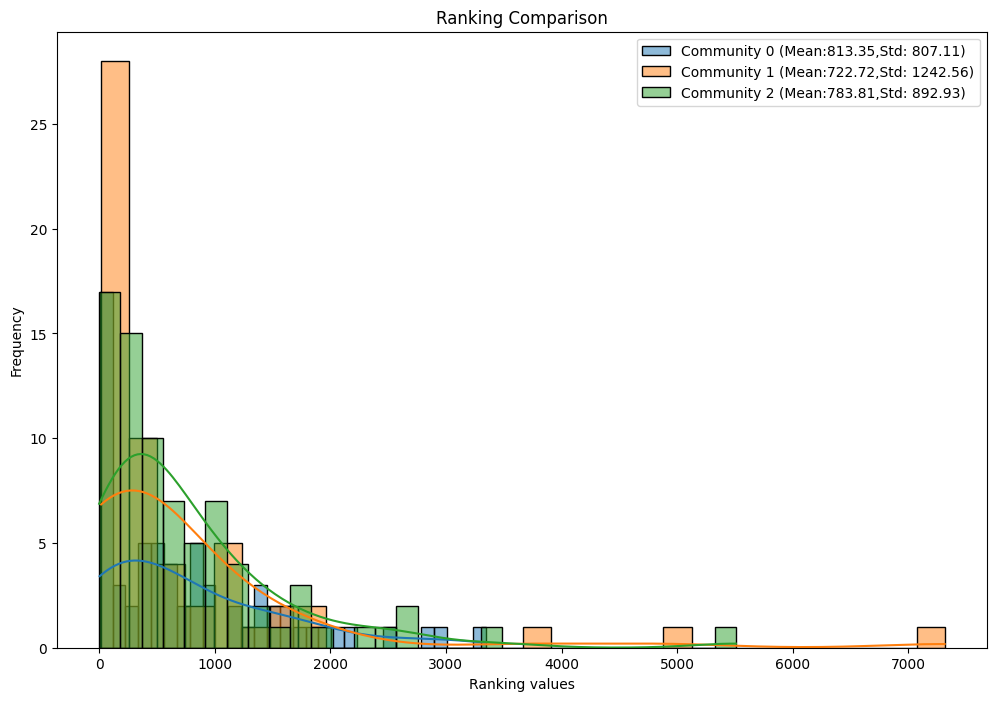

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(list(communities.keys()))):
    anime_community = anime_selected_df[anime_selected_df["community"] == i]
    mean_rank = round(anime_community['rank'].mean(),2)
    std_rank = round(anime_community['rank'].std(),2)

    sns.histplot(
        anime_community['rank'].to_list(),
        bins=30,
        kde=True,
        label=f'Community {i} (Mean:{mean_rank},Std: {std_rank})',
        kde_kws={"bw_adjust": 1}
    )

plt.xlabel('Ranking values')
plt.ylabel('Frequency')
plt.title('Ranking Comparison')


plt.legend()
plt.show()


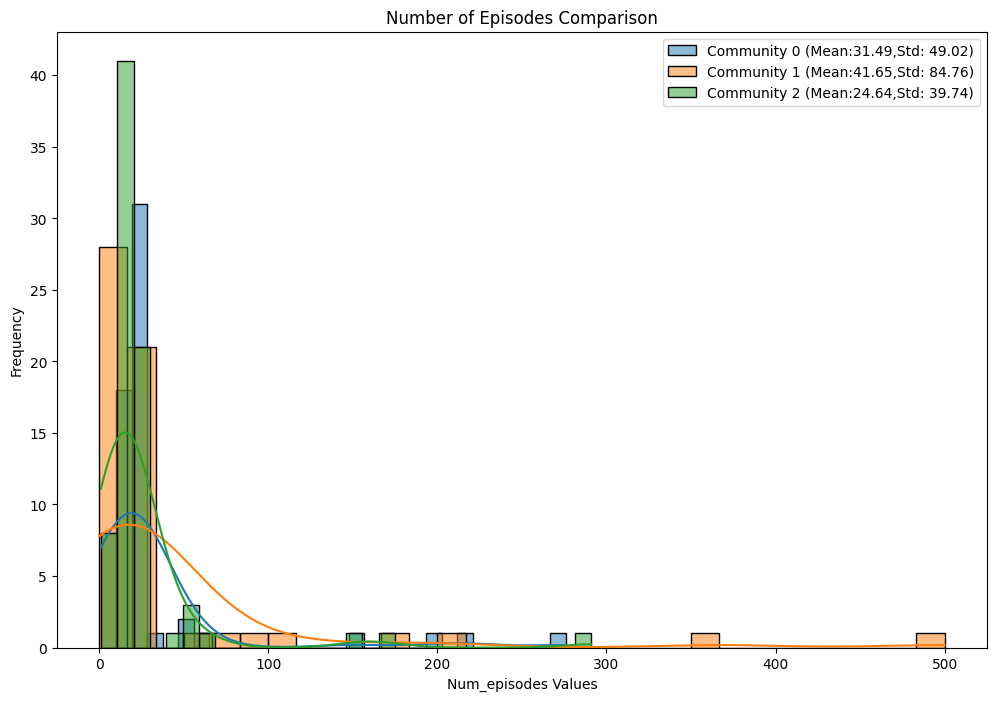

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(list(communities.keys()))):
    anime_community = anime_selected_df[anime_selected_df["community"] == i]
    # plt.hist(anime_community['episodes'].to_list(), bins=30, alpha=0.5, label=f'Num_episodes of community {i+1}')
    mean_ep = round(anime_community['episodes'].mean(),2)
    std_ep = round(anime_community['episodes'].std(),2)
    sns.histplot(
        anime_community['episodes'].to_list(),
        bins=30,
        kde=True,
        label=f'Community {i} (Mean:{mean_ep},Std: {std_ep})',
        kde_kws={"bw_adjust": 1}
    )

plt.xlabel('Num_episodes Values')
plt.ylabel('Frequency')
plt.title('Number of Episodes Comparison')


plt.legend()
plt.show()